In [52]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import json

In [53]:
result_path = "./eval_result.jsonl"

result_list = []
with open(result_path, "r") as fr:
    for line in fr.readlines():
        result_list.append(json.loads(line))

In [54]:
prompts = [x["prompt"] for x in result_list]

openai_gen = [x["openai_result"]["generation"] for x in result_list]
openai_prob = [x["openai_result"]["prob"] for x in result_list]
openai_ppls = [x["openai_result"]["ppls"] for x in result_list]

base_gen = [x["base_result"]["generation"] for x in result_list]
base_prob = [x["base_result"]["prob"] for x in result_list]
base_prob_list = [x["base_result"]["prob_list"][::-1] for x in result_list]
base_ppls = [x["base_result"]["ppls"] for x in result_list]

watermarked_gen = [x["watermarked_result"]["generation"] for x in result_list]
watermarked_prob = [x["watermarked_result"]["prob"] for x in result_list]
watermarked_ppls = [x["watermarked_result"]["ppls"] for x in result_list]

openai_attack_gen = [x["openai_attack_result"]["generation"] for x in result_list]
openai_attack_prob = [x["openai_attack_result"]["prob"] for x in result_list]
openai_attack_ppls = [x["openai_attack_result"]["ppls"] for x in result_list]

In [63]:
df = pd.DataFrame({
    "base_gen": base_gen,
    "openai_prob": openai_prob,
    "base_prob": base_prob,
    "watermarked_prob": watermarked_prob,
    "openai_attack_prob": openai_attack_prob,
    "base_prob_list": base_prob_list,
})
print(prompts[24])
print(base_gen[24])
display(df)

Do you remember the game from this fragment of box art? Leave your answer in the comments! For those curious as to what last Friday's Remember This game was, it was Afro Samurai.
Do you remember the game from this fragment of box art? Leave your answer in the comments! For those curious as to what last Friday's Remember This game was, it was Afro Samurai.


,base_gen,openai_prob,base_prob,watermarked_prob,openai_attack_prob,base_prob_list
0,Cluster comprises IBM's Opteron-based eServer ...,0.938200,0.970722,0.059038,0.701895,"[0.9765516519546509, 0.9931697845458984, 0.990..."
1,"Belying expectations, Prasar Bharti has earned...",0.928633,0.977078,0.364210,0.957054,"[0.9850731492042542, 0.9972323775291443, 0.992..."
2,Marketers are employed in the public sector as...,0.715448,0.954784,0.881639,0.907541,"[0.9547718167304993, 0.9580110311508179, 0.967..."
3,"MIDDLETOWN, NJ - The Middletown Township Publi...",0.984661,0.949498,0.511201,0.856506,"[0.9841310381889343, 0.976332426071167, 0.9750..."
4,An eagerly awaited report from the World Healt...,0.971273,0.982805,0.115957,0.628812,"[0.9976204037666321, 0.9968444108963013, 0.995..."
5,Google has announced that it will be shutting ...,0.979923,0.954529,0.041893,0.612671,"[0.988911509513855, 0.9883536100387573, 0.9904..."
6,Was it a surprise to you that you were given t...,0.856520,0.835021,0.627623,0.719767,"[0.9835827946662903, 0.9681069254875183, 0.984..."
7,WASHINGTON (Reuters) - U. S. President Donald ...,0.966820,0.947082,0.117192,0.478222,"[0.9378398656845093, 0.9496886134147644, 0.975..."
8,Im definetely with some of the above posts whe...,0.965965,0.483245,0.038870,0.912901,"[0.0692896842956543, 0.06515133380889893, 0.04..."
9,"In case you missed it, the initials ICYMI stan...",0.774444,0.985346,0.040802,0.135981,"[0.9919276237487793, 0.9921757578849792, 0.987..."


In [60]:
from sklearn.metrics import roc_auc_score, average_precision_score
prob = np.array(openai_prob + base_prob + watermarked_prob)
label = np.array([1] * (len(openai_prob) + len(base_prob)) + [0] * len(watermarked_prob))
auroc = roc_auc_score(label, prob)
print(f"auroc: {auroc}")
auprc = average_precision_score(label, prob)
print(f"auprc: {auprc}")

prob = np.array(openai_prob + base_prob + watermarked_prob + openai_attack_prob)
label = np.array([1] * (len(openai_prob) + len(base_prob)) + [0] * len(watermarked_prob + openai_attack_prob))
auroc = roc_auc_score(label, prob)
print(f"auroc: {auroc}")
auprc = average_precision_score(label, prob)
print(f"auprc: {auprc}")


fig, ax = plt.subplots()
ax.hist(openai_prob, bins=25, label="openai")
ax.hist(openai_attack_prob, bins=25, label="openai_attack")
ax.hist(base_prob, bins=25, label="llama-3 8b")
ax.hist(watermarked_prob, bins=25, label="llama-3 8b w. wm")
ax.legend()
plt.title("Distribution of unwatermarked probability")
plt.show()

ValueError: Input contains NaN.

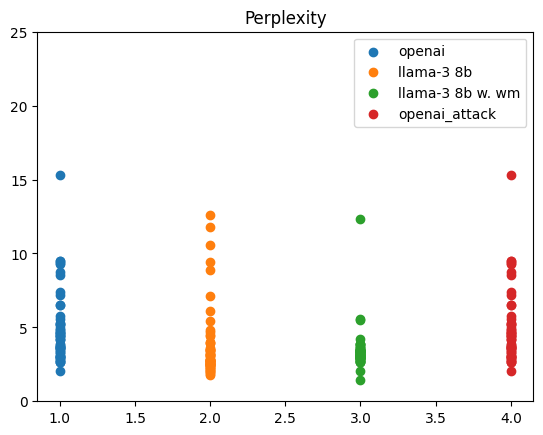

In [57]:
fig, ax = plt.subplots()
ax.scatter([1]*len(openai_ppls), openai_ppls, label="openai")
ax.scatter([2]*len(base_ppls), base_ppls, label="llama-3 8b")
ax.scatter([3]*len(watermarked_ppls), watermarked_ppls, label="llama-3 8b w. wm")
ax.scatter([4]*len(openai_attack_ppls), openai_ppls, label="openai_attack")
ax.set_ylim([0, 25])
ax.legend()
plt.title("Perplexity")
plt.show()